## Question 2 

### Part a

##### (1)

In [1]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt

In [2]:
rs_samples = pd.read_csv('samples/rs_1.csv', names= ['data'])
rs_samples.head()

,data
0,-1
1,2
2,-1
3,-1
4,-1


In [3]:
length = len(rs_samples)

In [4]:
def approxProbability(samples):
    acceptedNum = 0
    trueRainNum = 0
    y = [None]
    answer = []
    for i in range(1,length):
        #1: accepted sample with R = T
        if samples[i] == 1:
            acceptedNum += 1
            trueRainNum += 1
        #2: accepted sample with R = F
        elif samples[i] == 2:
            acceptedNum += 1
        y.append(trueRainNum / acceptedNum)

    # answer[0] = y
    answer.append(y)
    # answer[1] = acceptedNum
    answer.append(acceptedNum)
    return answer
    


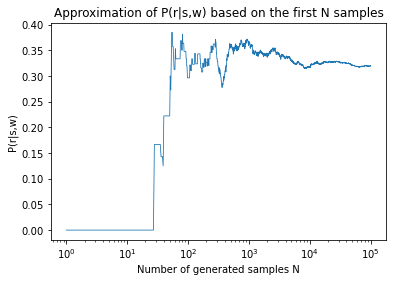

In [5]:
x = rs_samples.index
y = approxProbability(list(rs_samples['data']))[0]
plt.plot(x,y,linewidth = 0.8)
plt.title('Approximation of P(r|s,w) based on the first N samples')
plt.xlabel('Number of generated samples N')
plt.ylabel('P(r|s,w)')
plt.xscale('log')

##### (2)

In [6]:
approx = y[length - 1]
print("The algorithm's approximation of P(r|s,w) using 100000 samples is: {:.6}".format(approx))

The algorithm's approximation of P(r|s,w) using 100000 samples is: 0.319814


### Part b
##### (1)
Using Hoeffding's inequality to derive the tighest bound $\epsilon$, we have:

\begin{align*} 
2e^{-2n\epsilon^2} &< \delta\\
e^{-2n\epsilon^2} &< \frac{\delta}{2} \\ 
\frac{1}{e^{2n\epsilon^2}} &< \frac{\delta}{2} \\ 
\frac{2}{\delta} &< e^{2n\epsilon^2} \\
\ln{(\frac{2}{\delta})} &< \ln{(e^{2n\epsilon^2})} \\
\ln{(\frac{2}{\delta})} &< 2n\epsilon^2 \\
\epsilon^2 &> \frac{\ln{(\frac{2}{\delta})}}{2n} \\
\epsilon &> \sqrt{\frac{\ln{(\frac{2}{\delta})}}{2n}}
\end{align*}

##### (2)

In [7]:
acceptedSampleNum = approxProbability(list(rs_samples['data']))[1]
print("At N=100000, there are n={} accepted samples.".format(acceptedSampleNum))

At N=100000, there are n=27910 accepted samples.


##### (3)

In [8]:
def computeEpsilon(n):
    delta = 0.05
    return math.sqrt(math.log(2/delta)/(2*n))

Given $n = 27910$ and $\delta = 0.05$, we have:

In [9]:
epsilon = computeEpsilon(27910)
print("The value of ε for n=27910 is {:.6}.".format(epsilon))

The value of ε for n=27910 is 0.00812928.








##### (4)

In [10]:
def upToPointEpsilons(samples):
    acceptedNum = 0
    e = [None]
    for i in range(1,length):
        if samples[i] == 1 or samples[i] == 2:
            acceptedNum += 1
        currEpsilon = computeEpsilon(acceptedNum,)
        e.append(currEpsilon)

    return e


In [11]:
def confidenceBounds(s, e):
    size = len(s)
    upperBound = [None]
    lowerBound = [None]
    bounds = []
    # probability should be in [0,1]
    for i in range(1,size):
        upperBound.append(min(s[i]+e[i],1))  # upper bound <=1
        lowerBound.append(max(s[i]-e[i],0))  # lower bound >=0
    
    # bounds[0] = upperBound
    bounds.append(upperBound)
    # bounds[1] = lowerBound
    bounds.append(lowerBound)

    return bounds


In [12]:
s = approxProbability(list(rs_samples['data']))[0]
e = upToPointEpsilons(list(rs_samples['data']))
upperBound = confidenceBounds(s,e)[0]
lowerBound = confidenceBounds(s,e)[1]

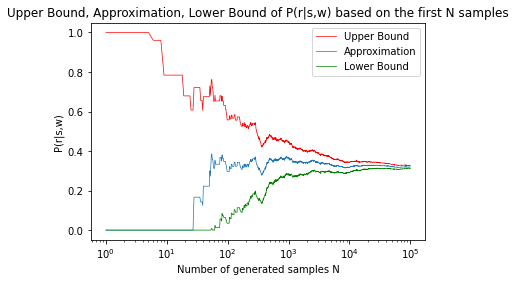

In [13]:
x = rs_samples.index

plt.plot(x,upperBound,linewidth = 0.7, c = 'r')
plt.plot(x,s,linewidth = 0.7)
plt.plot(x,lowerBound,linewidth = 0.7, c = 'g')

plt.legend(labels = ['Upper Bound', 'Approximation', 'Lower Bound'])
plt.title('Upper Bound, Approximation, Lower Bound of P(r|s,w) based on the first N samples')
plt.xlabel('Number of generated samples N')
plt.ylabel('P(r|s,w)')
plt.xscale('log')

### Part c

##### (1)

In [14]:
lw_samples = pd.read_csv('samples/lw_1.csv', names= ['samples', 'weights'])
# 1 based index
lw_samples.index += 1
lw_samples.head()

,samples,weights
1,2,0.450
2,1,0.495
3,2,0.090
4,2,0.450
5,2,0.450


In [15]:
# 1 denotes R=T
# 2 denotes R=F
def lwProbability(samples, weights):
    tSampleWeights = 0
    totalWeights = 0
    y = []
    for i in range(0, len(samples)):
        totalWeights += weights[i]
        if samples[i] == 1:
            tSampleWeights += weights[i]
        y.append(tSampleWeights/totalWeights)
    return y


In [16]:
lw_y = lwProbability(list(lw_samples['samples']), list(lw_samples['weights']))
lwApprox = lw_y[len(lw_y) - 1]
print("The algorithm's approximation of P(r|s,w) using 100000 samples is: {:.6}".format(lwApprox))

The algorithm's approximation of P(r|s,w) using 100000 samples is: 0.321788


##### (2)

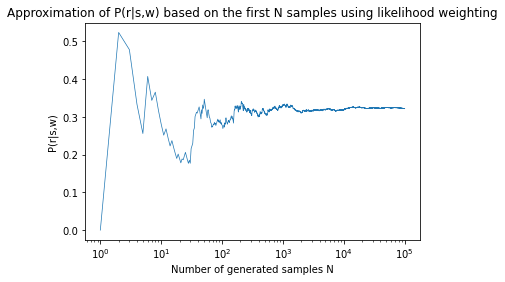

In [17]:
lw_x = lw_samples.index
lw_y = lwProbability(list(lw_samples['samples']), list(lw_samples['weights']))
plt.plot(lw_x,lw_y,linewidth = 0.7)
plt.title('Approximation of P(r|s,w) based on the first N samples using likelihood weighting')
plt.xlabel('Number of generated samples N')
plt.ylabel('P(r|s,w)')
plt.xscale('log')

##### (3)

The likelihood weigting algorithm seems to converge faster, especially when $N > 10^3$, whereas rejection sampling algorithm tends to converge when $N > 10^4$.